# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

# Задачи

    - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
    - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
    - проанализировать основные признаки, наиболее сильно влияющие на отток;
    - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.
    - подготовить презентацию

# Описание данных

    - 'Churn' — факт оттока в текущем месяце;
    - Текущие поля в датасете:
        - Данные клиента за предыдущий до проверки факта оттока месяц:
            - 'gender' — пол;
            - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
            - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
            - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
            - 'Phone' — наличие контактного телефона;
            - 'Age' — возраст;
            - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    - Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
        - 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
        - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
        - 'Group_visits' — факт посещения групповых занятий;
        - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
        - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
        - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Шаг 1. Загрузка данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Загрузим файл /datasets/gym_churn.csv. Изучим данные с помощью метода info(). Выведем первые строки таблицы методом head(), чтобы познакомиться с данными.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install seaborn --upgrade  

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 2.7 MB/s eta 0:00:01


In [3]:
import seaborn as sns, numpy as np

In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
gym = pd.read_csv('/datasets/gym_churn.csv', sep=',')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


В датасете 14 колонок с записями о клиентах и  действиях: булевое gender типа int64, булевое Near_Location типа int64, булевое Partner типа int64, булевое Promo_friends типа int64, булевое Phone типа int64, Contract_period типа int64, Group_visits типа int64, Age типа int64, Avg_additional_charges_total типа float64, Month_to_end_contract типа float64, Lifetime типа int64, Churn типа int64, Avg_class_frequency_total типа float64 и Avg_class_frequency_current_month типа float64. Всего 4000 строк в каждом столбце, значит, пропусков нет.


Все типы данных корректны.

## Шаг 2.  EDA

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());


В названиях столбцов изменим регистр на нижний, чтобы избежать путаницы.

In [7]:
gym.columns = gym.columns.str.lower()

Пробежимся по данным и проверим их на корректность. Для этого воспользуемся методом describe().

In [8]:
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [9]:
gym['gender'].describe()

count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

По полу распределение почти 50 на 50. Стандартное отклонение - 0.5.

In [10]:
gym['near_location'].describe()

count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: near_location, dtype: float64

Примерно 80% клиентов из выборки проживают или работают в районе, где находится фитнес-центр. Стандартное отклонение небольшое - 0.36.

In [11]:
gym['partner'].describe()

count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64

Почти половина клиентов из выборки (49%) - это сотрудники компании-партнёра клуба. Стандартное отклонение - 0.5.

In [12]:
gym['promo_friends'].describe()

count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: promo_friends, dtype: float64

30% клиентов - это те, кто использовал промо-код от знакомого при оплате первого абонемента. Стандартное отклонение - 0.46.

In [13]:
gym['phone'].describe()

count    4000.000000
mean        0.903500
std         0.295313
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: phone, dtype: float64

У 90% клиентов из выборки указан контактный телефон. Стандартное отклонение - 0.29.

In [14]:
gym['contract_period'].describe()

count    4000.000000
mean        4.681250
std         4.549706
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: contract_period, dtype: float64

Длительность текущего действующего абонемента у всех разная. Среднее - это 4-5 месяцев, медиана - 1 месяц. Вероятно, присутствуют выбросы. Максимальное значение - 12 месяцев. 

In [15]:
gym['group_visits'].describe()

count    4000.000000
mean        0.412250
std         0.492301
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: group_visits, dtype: float64

41% клиентов посещают групповые занятия. Стандартное отклонение небольшое - 0.49.

In [16]:
gym['age'].describe()

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: age, dtype: float64

Максимальный возраст клиентов - 41 год, среднее значение возраста рядм с медианой - 29 лет, значит, скорее всего, с распределением возрастов все в порядке. Минимальный возраст клиентов - 18 лет.

In [17]:
gym['avg_additional_charges_total'].describe()

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: avg_additional_charges_total, dtype: float64

Суммарная выручка от других услуг фитнес-центра (кафе, спорт-товары, косметический и массажный салон) в среднем составляет 147 у.е., медианное значение довольно близко к среднему - 136 у.е. Стандартное отклонение довольно ощутимое - 96.3. Максимальный размер трат - 552 у.е.

In [18]:
gym['month_to_end_contract'].describe()

count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

Средний срок до окончания текущего действующего абонемента - 4 месяца, медианное значение - 1 месяц. Это говорит о том, что на среднее влияют выбросы (масимальное значение  12 месяцев). Также уже сейчас можно заметить, что клиентов, у которых остался всего месяц до окончания абонемента, больше, чем клиентов, у которых абонемент только начался.

In [19]:
gym['lifetime'].describe()

count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: lifetime, dtype: float64

Если смотреть на время с момента первого обращения в фитнес-центр (в месяцах), то можно увидеть, что большиство клиентов - относительные новички, обратились в фитнес клуб около 3 месяцев назад. Максимальное значение для этой величины - 31 месяц, т.е., почти три года.  

In [20]:
gym['avg_class_frequency_total'].describe()

count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: avg_class_frequency_total, dtype: float64

Средняя частота посещений в неделю за все время с начала действия абонемента - 1-2 раза. Максимальное значение - 6 дней в неделю. Стандартное отклонение - 0.9.

In [21]:
gym['avg_class_frequency_current_month'].describe()

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64

Cредняя частота посещений в неделю за предыдущий месяц - 1-2 дня. 

In [22]:
gym['churn'].describe()

count    4000.000000
mean        0.265250
std         0.441521
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn, dtype: float64

Отток в текущем месяце составил 26%. Стандартное отклонение - 0.44.

<font color="#6600FF">Выведем средние значения и стандартные отклонения всех признаков в одной таблице для наглядности.</font>

In [23]:
display(gym.agg(['mean','std']))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521


<font color="#6600FF">Самое большое стандартное отклонение у колонки Price с тратами на дополнительные услуги (96.3). По всем остальным признакам страндартное отклонение небольшое (от 0.3 до 4).</font>

In [26]:
#посчитаем коэффициент вариации
a = gym.agg(['mean','std'])
a.loc[a.index == 'std']/a.loc[a.index == 'mean'].values

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
std,0.979828,0.427934,1.026989,1.497348,0.326854,0.9719,1.194181,0.111648,0.655731,0.969591,1.006582,0.517421,0.595854,1.664548


Для признаков gender, near_location, partner, promo_friends, phone, contract_period, group_visits, avg_additional_charges_total, month_to_end_contract, lifetime, avg_class_frequency_total, avg_class_frequency_current_month, churn выборка вариабельна сильно.
Для признака age выборка вариабельна слабо.

Посмотрим на дубликаты.

In [27]:
gym[gym.duplicated()]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn


Полных дубликатов строк нет.

### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());


In [28]:
display(gym.groupby('churn')['gender'].agg('count'))

churn
0    2939
1    1061
Name: gender, dtype: int64

Отток составил 1061 человек, осталось 2939 человек.

In [29]:
display(gym.groupby('churn').agg('mean'))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


* Распределение по полу примерно равное как для тех кто ушел, так и для тех, кто остался.
* Из тех, кто ушел, 76% жили или работали там, где находился фитнес-центр, а 18% первоначально записывались в рамках акции «приведи друга». 
* Признак phone с наличием контактного телефона тоже не отличатся (90%) для обеих групп. 
* Заметно, что среди тех, кто ушел, только 26% посещали групповые занятие, а среди тех, кто остался, таких 46%. 
* Видим, что ушедшие - это люди с небольшим перодом контракта: 1-2 месяца. Оставшиеся - с бОльшим периодом контракта: 5-6 месяцев.
* Возраст практически одинаковый для обеих групп (26-30 лет).
* Если смотреть на траты на другие услуги фитнес-центра, то видим, что среди ушедших средние траты были примерно 115 у.е, а среди оставшихся - 158 у.е.
* Интересный момент: среди ушедших средний лайфтайм с момента первого обращения в фитнес-центр - меньше месяца. Значит, есть проблемы с удержанием, клиенты не смогли заинтересоваться и спустя месяц ушли.
* Промежуточный вывод - активнее остаются клиенты с более длительным сроком абонемента.
* Средняя частота посещений в неделю за предыдущий месяц у тех, кто остался, больше (2 раза в неделю), чем у тех, кто ушел (1 раз в неделю).

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);


In [30]:
#hist = [gym[i].hist() if i != 'churn' for i in gym.columns.get_values().tolist()]
gym_churn_1 = gym.query('churn == 1')
gym_churn_0 = gym.query('churn == 0')
columns = gym.drop(columns=['churn']).columns.get_values().tolist()
#выделим отдельно дискретные признаки с малым числом принимаемых значений (в том числе бинарные)
binary_columns = gym.drop(columns=['churn', 'age', 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']).columns.get_values().tolist()
def create_hist(df, columns):
    for i in columns:
        #Построим гистограмму. Зададим размер
        plt.figure(figsize =(10, 4))
        #Строим график
        sns.distplot(gym[i], kde=False, norm_hist=True)
#         hist = df[i].plot(           
#                 kind='hist',   # говорим, что это гистограмма
#                 bins=100,     # задаем размер корзин
#                 alpha=0.5,    # прозрачность графика
#                 ec='black',   # цвет обводки
#                 color='blue',  # цвет графика
#                 )
        #Чтобы было легче читать гистограмму, добавим линии медианы и квантилей.
        #Линия медианы
        if i not in binary_columns:
            plt.axvline(x=df[i].median(),   
                linewidth=3,   # толщина линии
                color='red',   # цвет линии
                linestyle='--')  # тип линии
            #Линия 5 квантиля
            plt.axvline(x=df[i].quantile(.05),   
                linewidth=3, 
                color='b', 
                linestyle='--')
            #Линия 95 квантиля
            plt.axvline(x=df[i].quantile(.95),
                linewidth=3, 
                color='b', 
                linestyle='--')
        #Зададим заголовок
        plt.title('Распределение признака {}'.format(i))
        #Подишем ось x
        plt.xlabel('Значение')
        #Подпишем ось y
        plt.ylabel('Частота')
        plt.grid() 
        plt.show()  

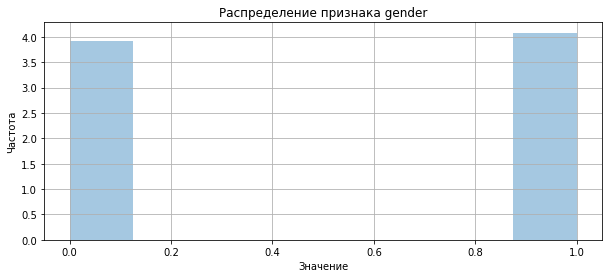

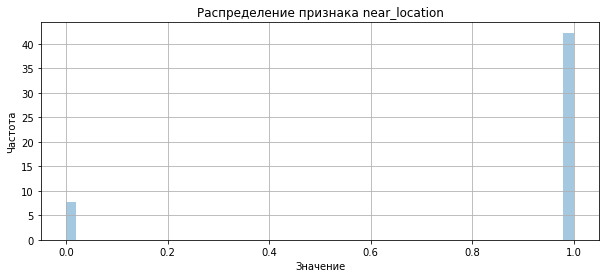

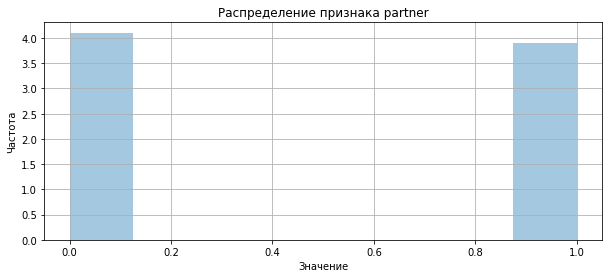

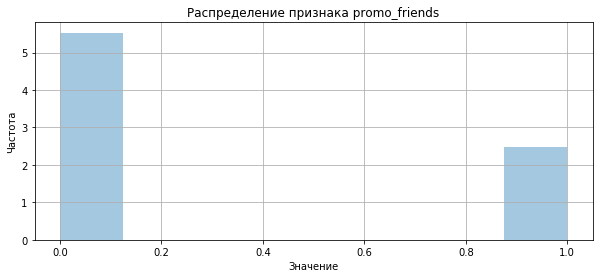

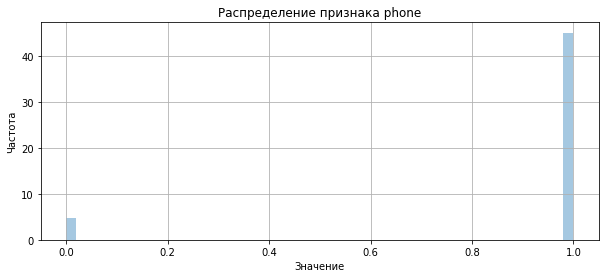

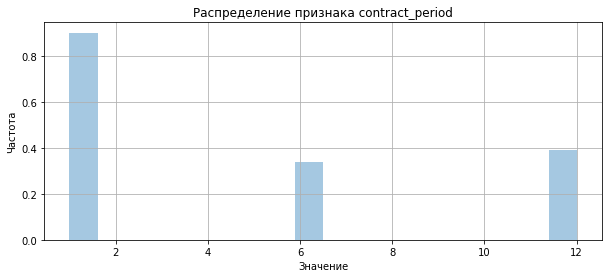

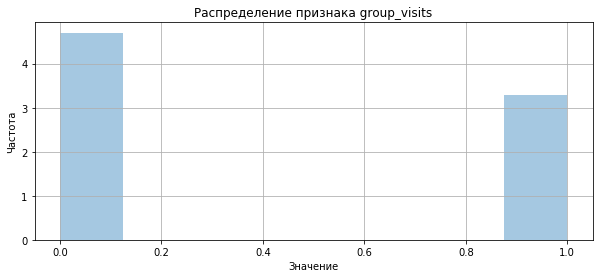

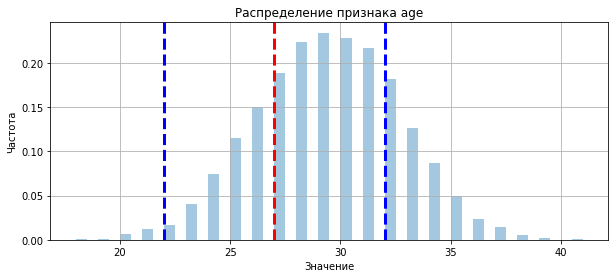

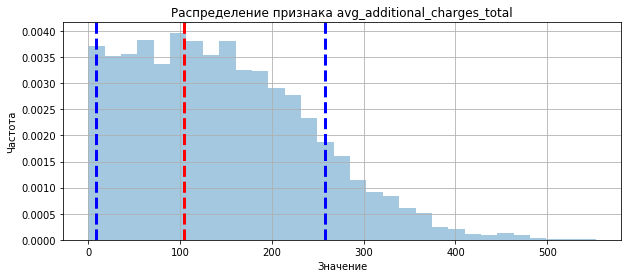

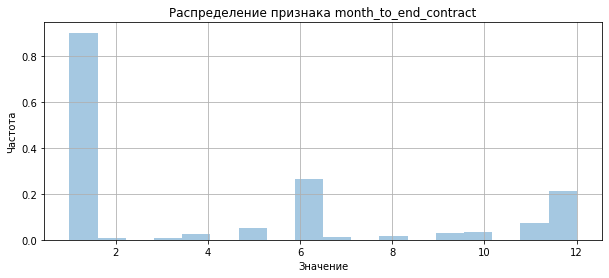

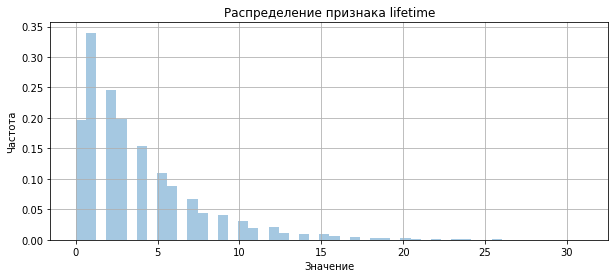

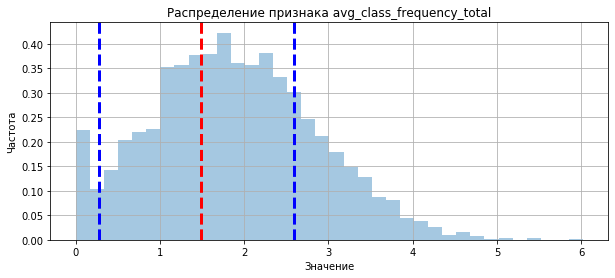

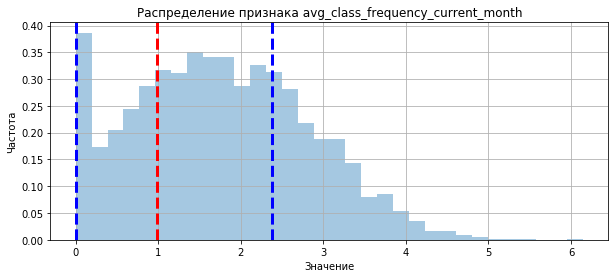

In [31]:
create_hist(gym_churn_1, columns)

Выводы из графиков для тех, кто ушел (отток):
1. Распределение мужчин и женщин примерно 50 на 50.
2. У большинства ушедших клуб находился рядом с домом или работой (~ 80%)
3. Большинство ушедших клиентов(~ 70%) - это не сотрудники компаний-партнёров клуба 
4. Большинство клиентов из оттока (>80%) пришли не по акции "приведи друга"
5. Практически все клиенты оставили контанктный номер телефона (тех, кто не оставил, примерно 100 человек, или 10%)
6. Длительность текущего действующего абонемента для ушедших клиентов в большинстве своём составляет 1 месяц (90%). У оставшихся 10% длительность абонемента 6 месяцев.
7. Из числа ушедших клиентов бОльшая часть не ходила на групповые занятия (почти 80%), оставшиеся 20% занятия посещали.
8. Распределение возраста - нормальное, медиана находится в районе 27 лет.
9. Рапределение трат на дополнительные услуги смещено влево, есть хвост после 95-го квантиля (> 260 у.е.). Медианное значение трат располагается в районе 100 у.е.
10. У большинства ушедших до окончания абонемента оставался 1 месяц.
11. Медианное время с момента первого обращения в фитнес-центр - 1 месяц. Также довольно мнго тех, кто состоял в клубе меньше месяца. Заметно, что есть проблемы с удержанием.
12. Распределение средней частоты посещений в неделю за все время с начала действия абонемента - нормальное. Медиана располагается в районе 1.5.
13. Медианное значение средней частоты посещений в неделю за предыдущий месяц около 1. Это может значить, что те, кто ушел, стали ходить реже в последний месяц. 

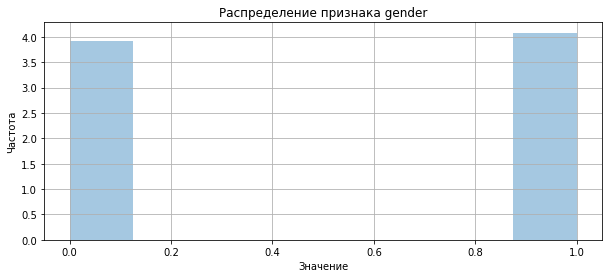

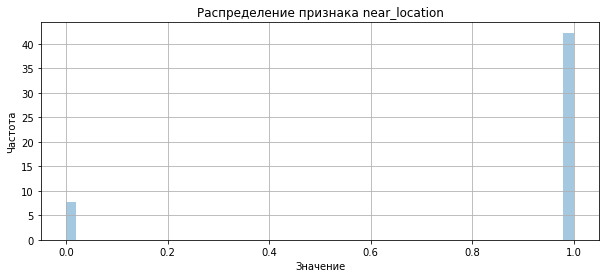

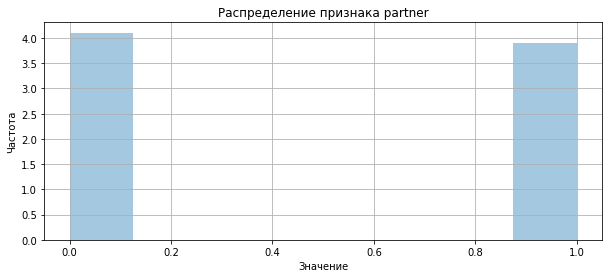

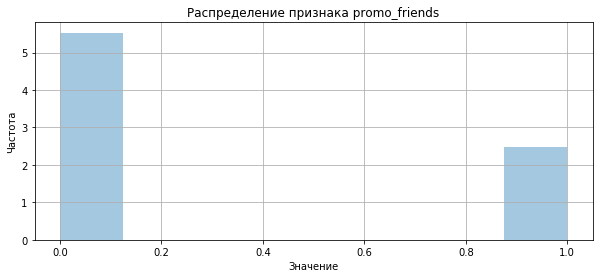

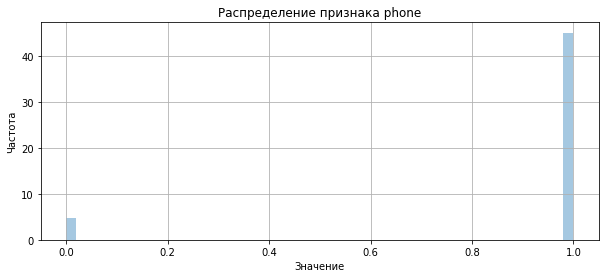

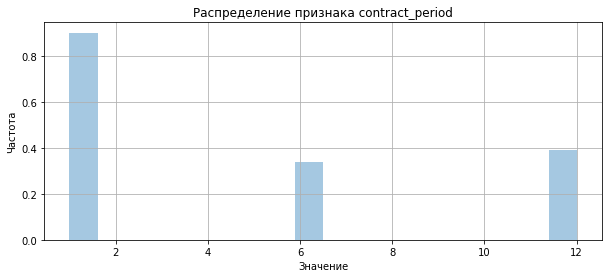

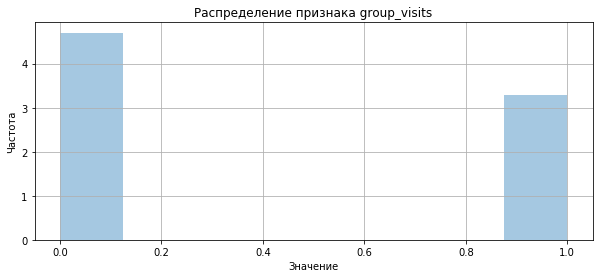

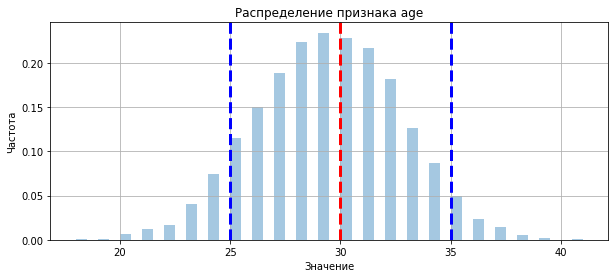

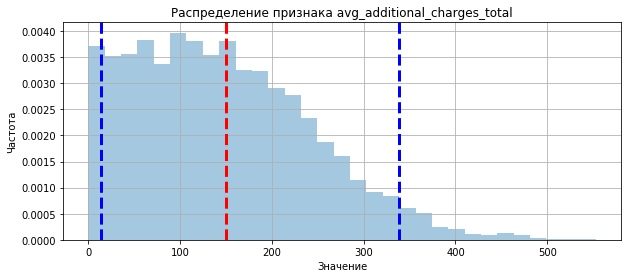

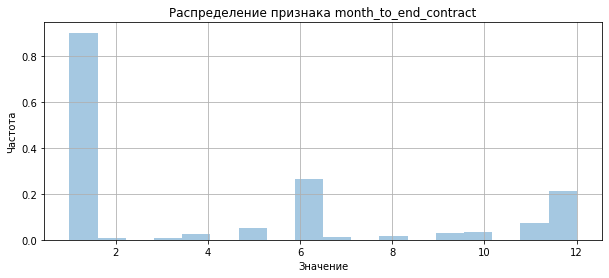

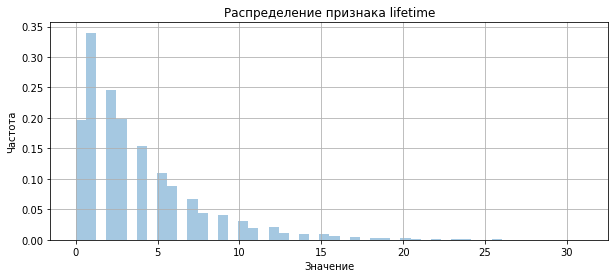

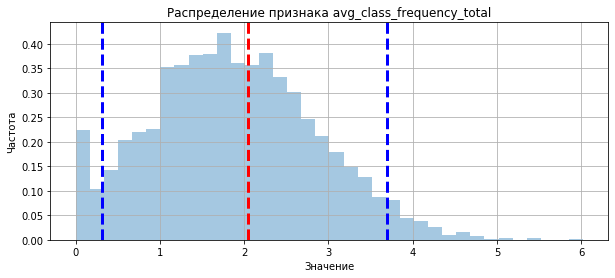

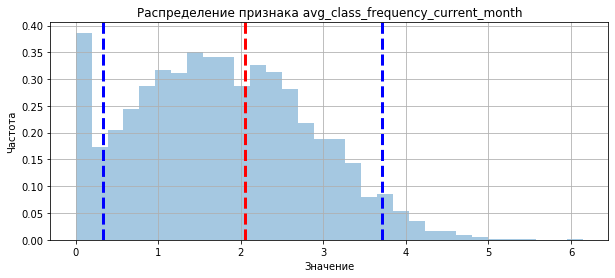

In [32]:
create_hist(gym_churn_0, columns)

Выводы из графиков для тех, кто остался (не попали в отток):
1. Распределение мужчин и женщин примерно 50 на 50.
2. У большинства оставшихся клуб находится рядом с домом или работой (~ 2550 клиентов)
3. Чуть больше половины оставшихся клиентов - это сотрудники компаний-партнёров клуба 
4. Большая часть оставшихся клиентов (2/3) пришли не по акции "приведи друга"
5. Практически все клиенты оставили контанктный номер телефона (тех, кто не оставил, примерно 250 человек)
6. Длительность текущего действующего абонемента для ушедших клиентов - 1 месяц(~40%), 12 месяцев (~ 35%) и 6 месяцев (~ 25%).
7. Из числа оставшихся клиентов бОльшая часть не ходит на групповые занятия (55%), оставшиеся 45% занятия посещают.
8. Распределение возраста - нормальное, медиана находится в районе 30 лет.
9. Рапределение трат на дополнительные услуги смещено влево, есть хвост после 95-го квантиля (> 340 у.е.). Медианное значение трат располагается в районе 150 у.е.
10. У большего числа оставшихся (~ 43%) до окончания абонемента остается 1 месяц, число тех, у кого осталось 6 и 12 месяцев до конца примерно одинаковое (с 6 месяцами чуть-чуть больше) - их примерно по 20%.
11. Медианное время с момента первого обращения в фитнес-центр - 4 месяца. Есть небольшой хвост (после 12 месяцев)
12. Распределение средней частоты посещений в неделю за все время с начала действия абонемента - нормальное. Медиана располагается в районе 2. Оставшиеся клиенты ходят чаще, чем ушедшие.
13. Медианное значение средней частоты посещений в неделю за предыдущий месяц тоже находится около 2. Это может значить, что у тех, кто остался, посещение клуба стало привычкой, и посещаемость закрепилась.

### Постройте матрицу корреляций и отобразите её.

In [33]:
gym.corr().style.background_gradient()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1,0.00669923,-0.0104626,-0.00503327,-0.00854212,0.000502261,0.0178789,0.0138069,-0.00933444,-0.00128079,0.0135786,0.0146202,0.00915649,0.000707734
near_location,0.00669923,1,-0.00511943,0.210964,-0.0157632,0.150233,0.154728,0.0583578,0.0407612,0.143961,0.0709206,0.0431275,0.0626636,-0.128098
partner,-0.0104626,-0.00511943,1,0.45196,0.00996961,0.306166,0.0227096,0.0474797,0.0229412,0.294632,0.0612294,0.0249379,0.0455611,-0.157986
promo_friends,-0.00503327,0.210964,0.45196,1,0.00198159,0.244552,0.12017,0.0501133,0.0368977,0.239553,0.0727211,0.0280632,0.0537684,-0.162233
phone,-0.00854212,-0.0157632,0.00996961,0.00198159,1,-0.00689326,-0.0100991,-0.0114032,0.00927943,-0.0111963,-0.0188012,0.00834047,0.0133749,-0.0011766
contract_period,0.000502261,0.150233,0.306166,0.244552,-0.00689326,1,0.169991,0.138249,0.111445,0.973064,0.170725,0.0962111,0.159407,-0.389984
group_visits,0.0178789,0.154728,0.0227096,0.12017,-0.0100991,0.169991,1,0.0809336,0.0320791,0.163703,0.0758528,0.0566948,0.0759233,-0.175325
age,0.0138069,0.0583578,0.0474797,0.0501133,-0.0114032,0.138249,0.0809336,1,0.0802401,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.00933444,0.0407612,0.0229412,0.0368977,0.00927943,0.111445,0.0320791,0.0802401,1,0.113958,0.0790283,0.0444264,0.0795697,-0.198697
month_to_end_contract,-0.00128079,0.143961,0.294632,0.239553,-0.0111963,0.973064,0.163703,0.134511,0.113958,1,0.161078,0.0853867,0.147605,-0.381393


Видим, что длительность текущего действующего абонемента хорошо коррелирует со сроком до окончания текущего действующего абонемента (0.97). Также хорошая корреляция заметна между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц (0.95).

Корелляция послабее (0.45) наблюдается между призаком 'Partner' (сотрудник компании-партнёра клуба) и признаком Promo_friends (факт первоначальной записи в рамках акции «приведи друга»). Возможно, коллеги по работе рекомендовали клуб другим своим коллегам.

Почистим явно дублирующиеся признаки - удалим по одному признаку в каждой паре. На случайный лес это аффектить не должно, но всё равно это будет хорошим тоном - исключить мультиколлинеарность. 

In [34]:
#исключим мультиколлинеарность
gym = gym.drop(columns=['contract_period', 'avg_class_frequency_current_month'])

## Шаг 3. Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:



### Разбейте данные на обучающую и валидационную выборку функцией train_test_split().


In [35]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop(columns=['churn'])
y = gym['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Обучите модель на train-выборке двумя способами: логистической регрессией и случайным лесом.


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [37]:
# зададим список моделей
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0)
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [38]:
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test
    )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy:0.88 Precision:0.76 Recall:0.77
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy:0.88 Precision:0.79 Recall:0.72


Обе модели показывают хорошую долю правильных ответов - 88% на логистичской регрессии и 88% случайным лесом. Однако над точностью и полнотой можно еще поработать, особенно в случае обучения случайным лесом.
Лучше себя показала логистическая регрессия.

## Шаг 4. Кластеризация клиентов

Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов).

### Стандартизируйте данные.


In [39]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.


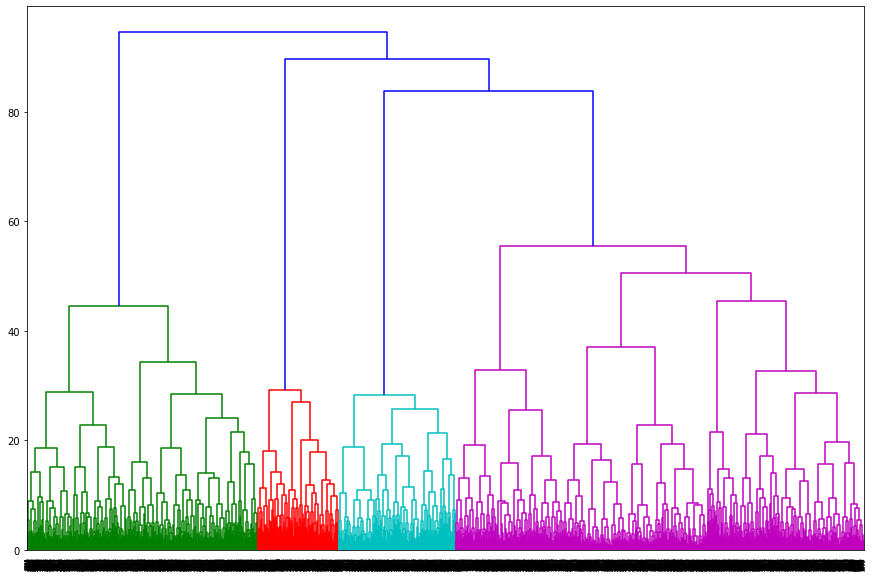

In [40]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании полученного графика можно выделить 4 кластера. Так как 4 кластер - довольно объёмный, разделим выборку на 5 кластеров.
После оценки оптимального числа кластеров можно запустить более быстрый алгоритм K-Means.

### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).


In [41]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?


In [42]:
# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
gym.groupby('cluster_km').agg('mean')

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


После разделения на 5 кластеров можно выявить следующие закономерности:

    1. В 0 кластере собраны клиенты, которые живут близко к клубу и пришли по акции друзей. Большинство - это сотрудники компании-партнёра клуба. В клуб они ходят около 4 месяцев, на дополнительные услуги тратят довольно много (152 у.е.), а до прекращения контракта у них осталось ~ 6 месяцев. Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю.
    
    2. В 1 кластере собраны клиенты, которые пришли не по акции друзей, живут далеко от клуба и почти не ходят на групповые занятия. Отток таких клиентов доволько большой, ~40%.
    
    3. Во 2 кластере собраны клиенты, которые живут близко к клубу, пришли не по акции друзей, со средней активностью посещают групповые занятия. Средний возраст - 31 год, на дополнительные услуги тратят довольно много (177 у.е.), а до прекращения контракта у них осталось ~ 6 месяцев. Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю. Отток таких клиентов совсем небольшой, ~1%.
    
    4. В 3 кластере собраны клиенты, которые живут/работают около клуба. Большинство - это не сотрудники компании-партнёра клуба и пришли не по акции друзей. Они редко посещают групповые занятия, довольно немного тратят на доп. услуги в клубе (~124 у.е.), у них скоро закончится контракт (осталось 2 месяца), при этом они сами недавно начали заниматься в клубе. Отток таких клиентов большой, ~50%.
    
    5. В 4 кластере собраны клиенты, не оставившие номер телефона. Живут они довольно близко к клубу, половина из клиентов - сотрудники компании-партнёра клуба. До окончания контракта у них ~ 4 месяца, отток таких клиенов небольшой, примерно 26%.

### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?


In [43]:
features = gym.groupby('cluster_km').agg('mean').reset_index()
features

,cluster_km,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
0,0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


In [44]:
columns = gym.drop(columns=['cluster_km']).columns.get_values().tolist()
def create_claster_hist(df, columns):
    for i in columns:
        print("Признак {}".format(i))
#         fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize=(50, 5))
        for j in sorted(df['cluster_km'].unique()):
            df_claster = df[df['cluster_km'] == j]
            plt.figure(figsize =(10, 4))
            sns.distplot(df_claster[i], kde=False, color="b")
#             axes[j].hist(df_claster[i],
#                         bins=100, 
#                         alpha=0.5, 
#                         ec='black',
#                         color='green',
#                         )
            plt.ylabel('Частота')
            plt.xlabel('Claster='+ str(j))
            plt.title(i)
            plt.grid()
#     plt.subplots_adjust(wspace=0.3, hspace=0.6)
            plt.show()

Признак gender


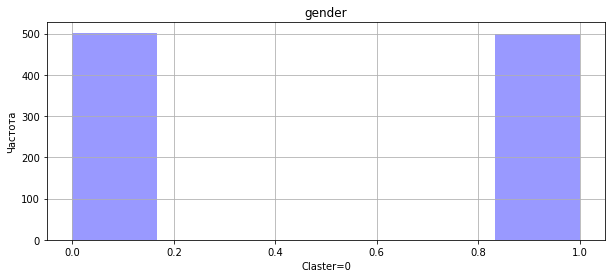

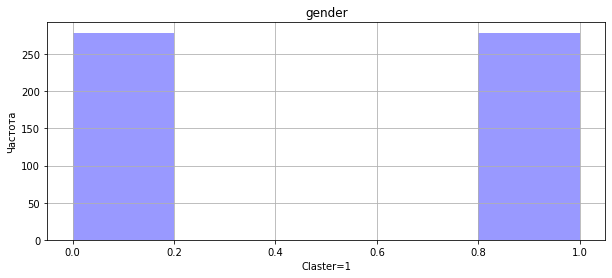

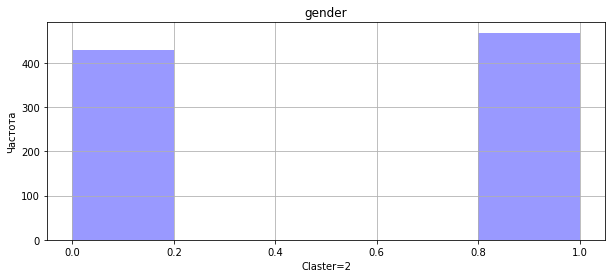

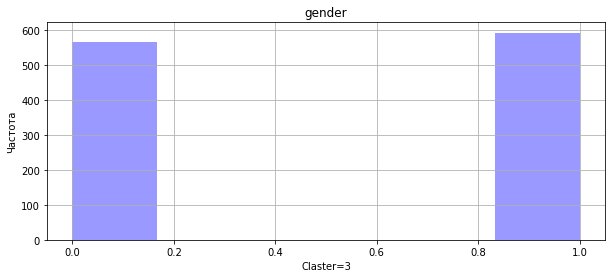

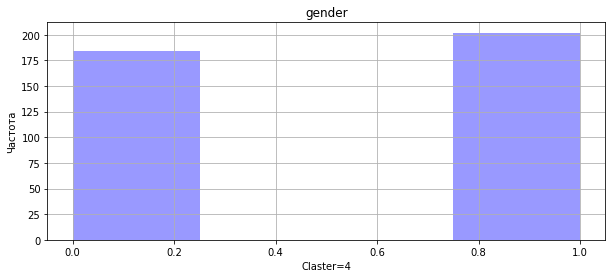

Признак near_location


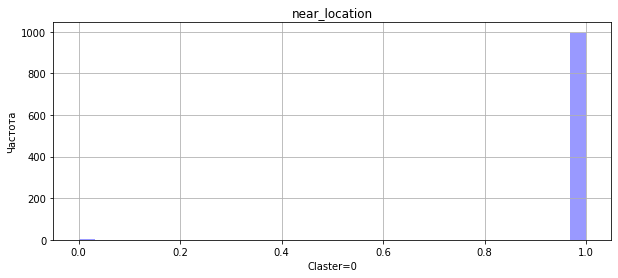

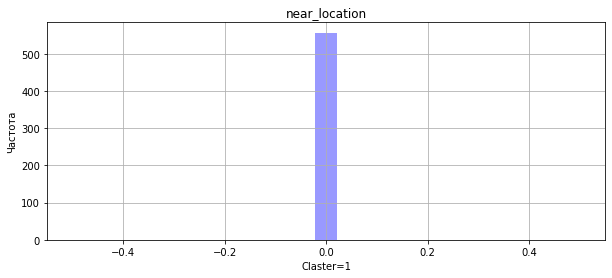

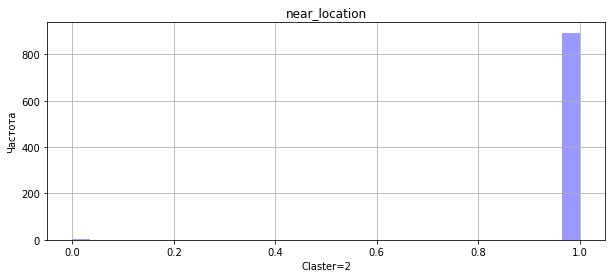

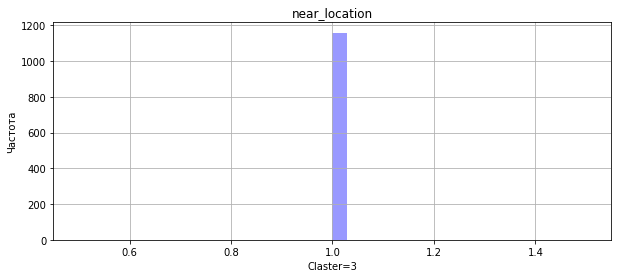

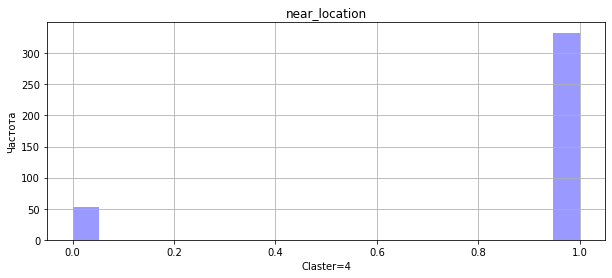

Признак partner


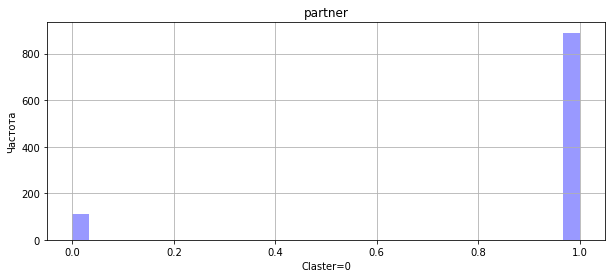

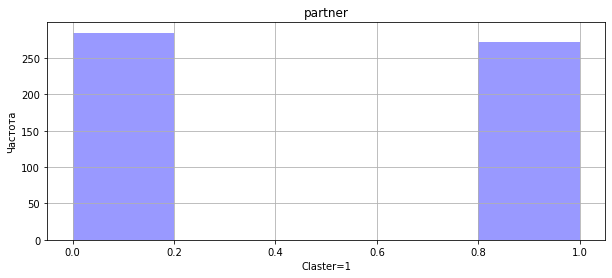

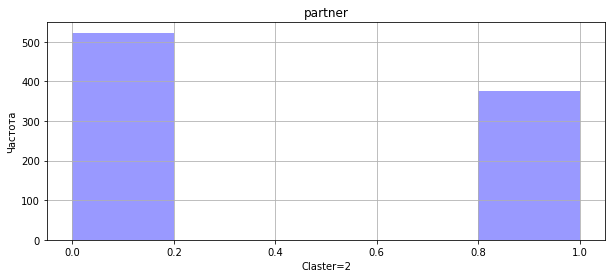

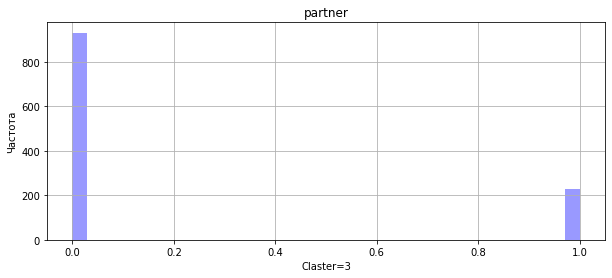

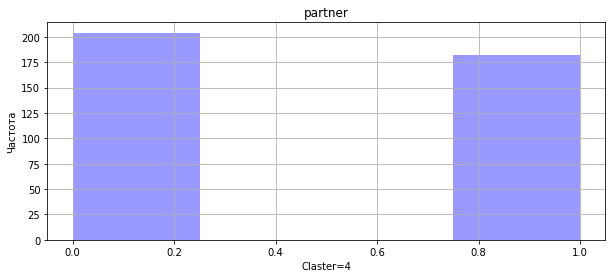

Признак promo_friends


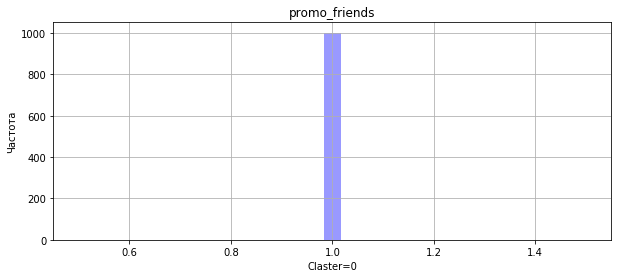

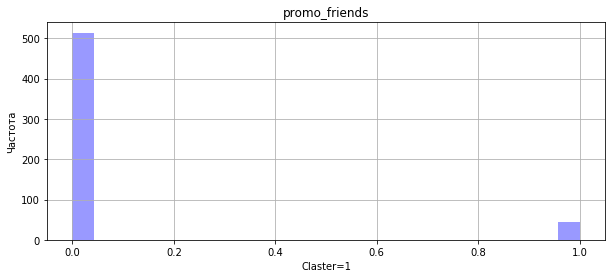

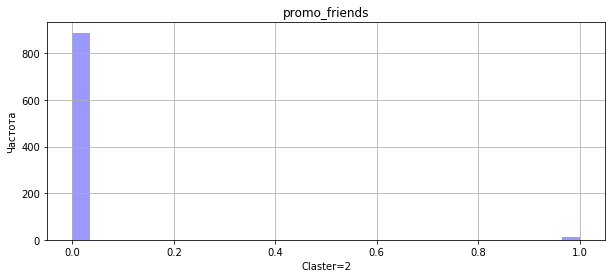

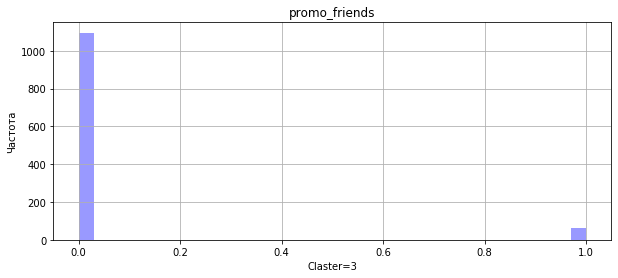

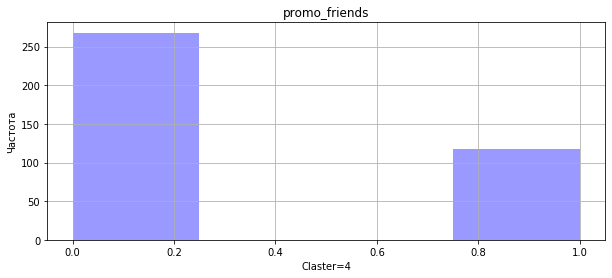

Признак phone


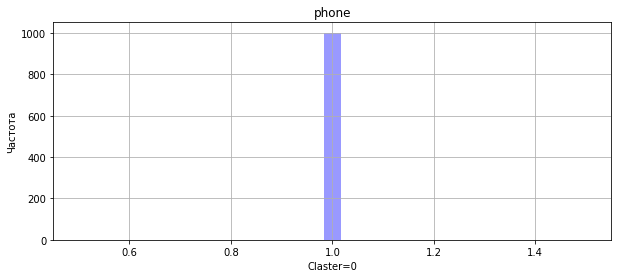

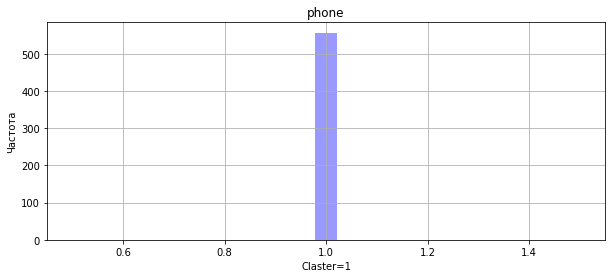

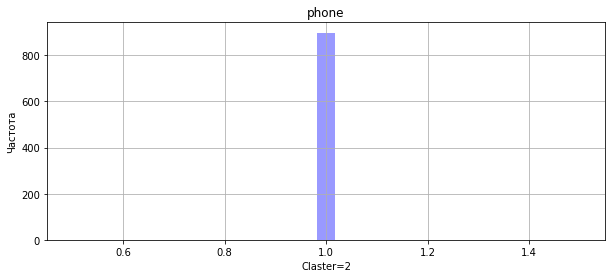

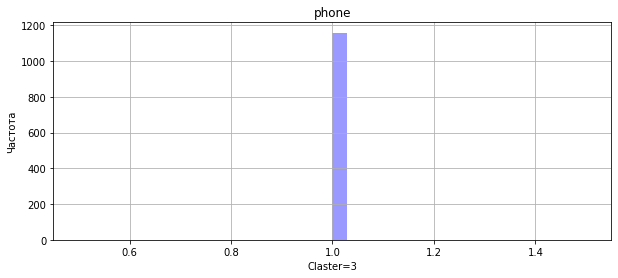

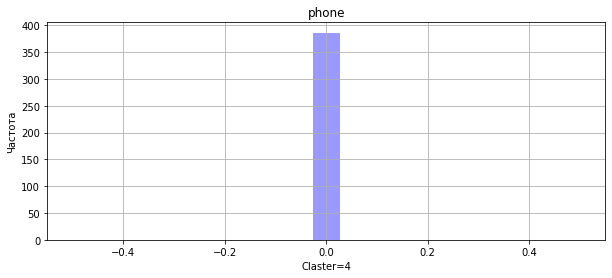

Признак group_visits


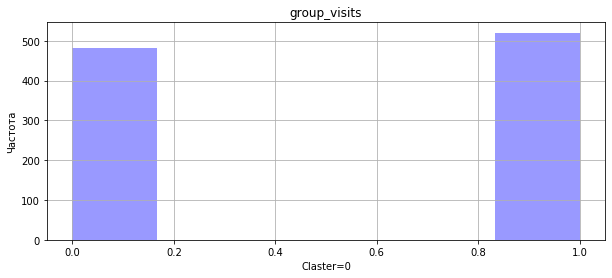

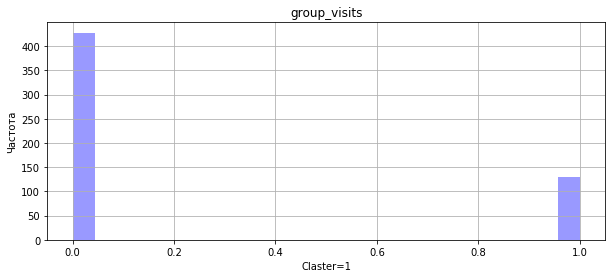

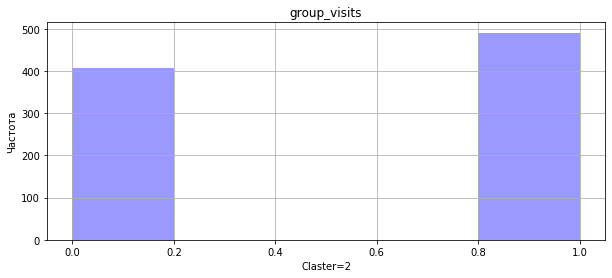

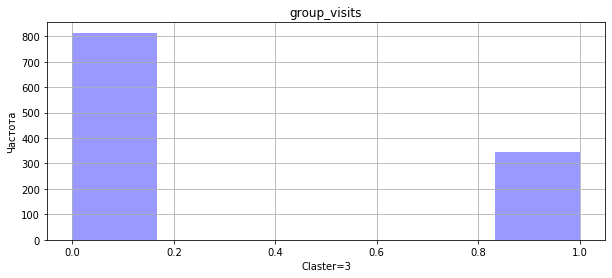

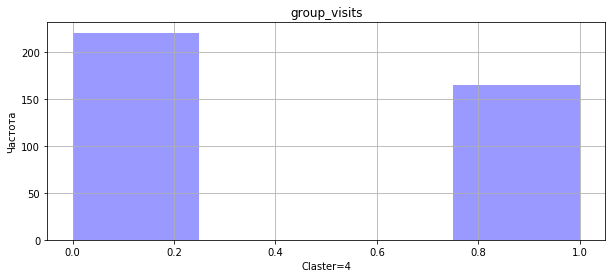

Признак age


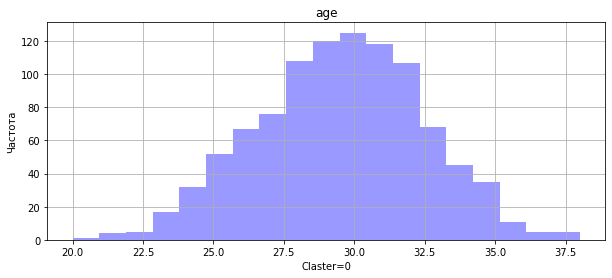

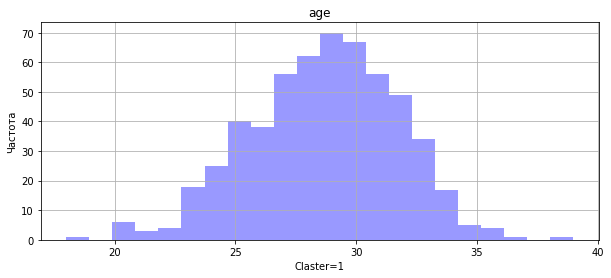

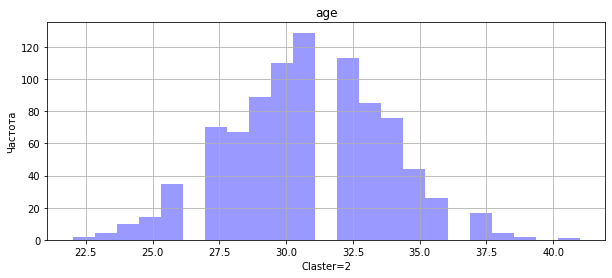

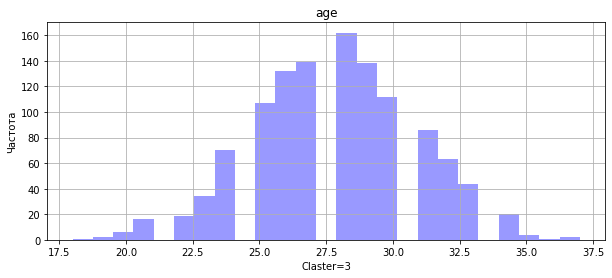

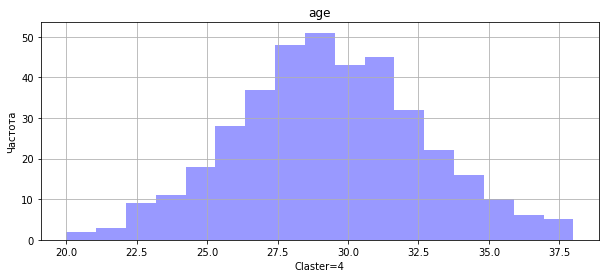

Признак avg_additional_charges_total


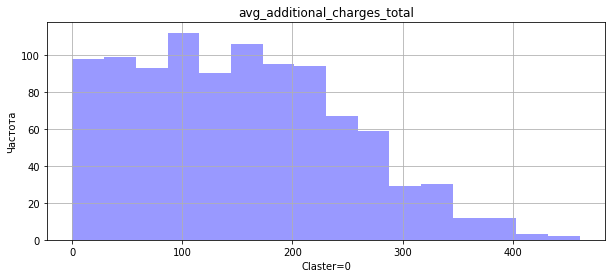

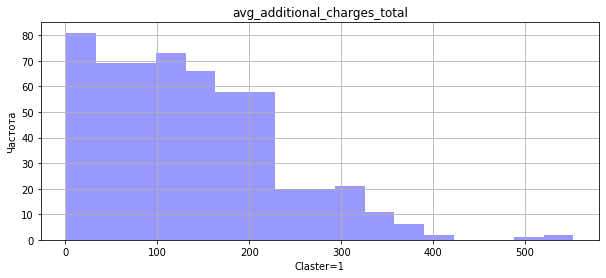

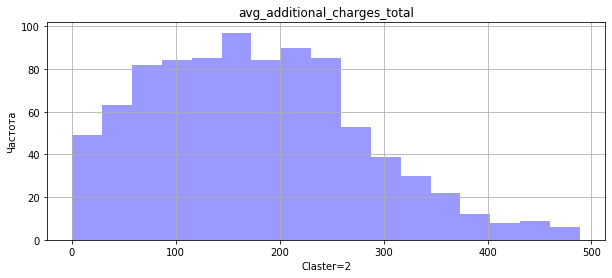

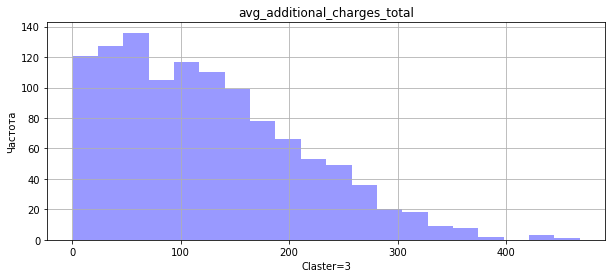

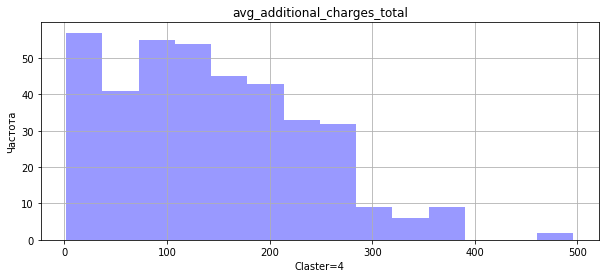

Признак month_to_end_contract


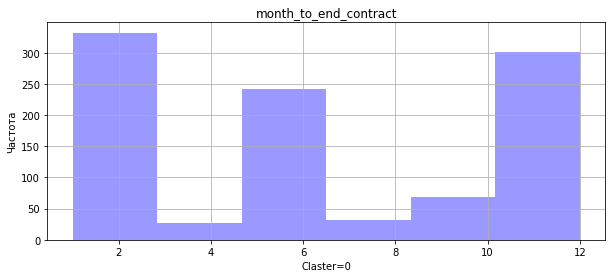

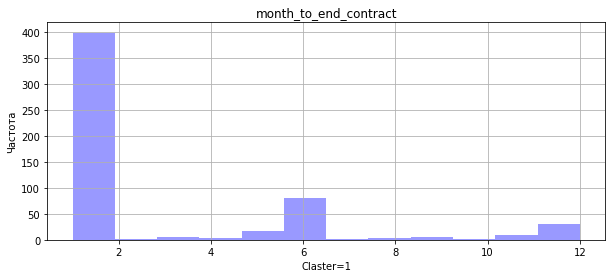

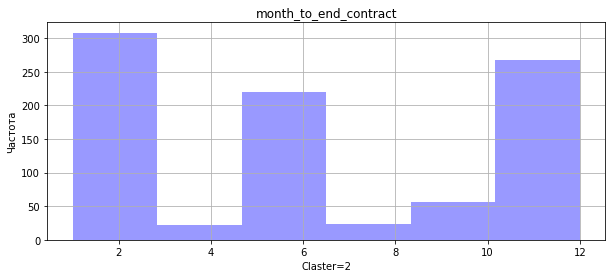

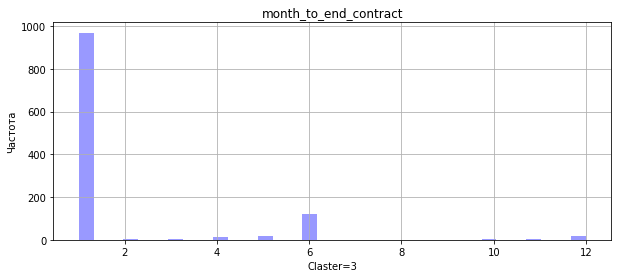

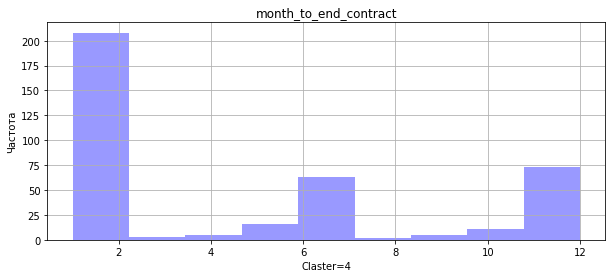

Признак lifetime


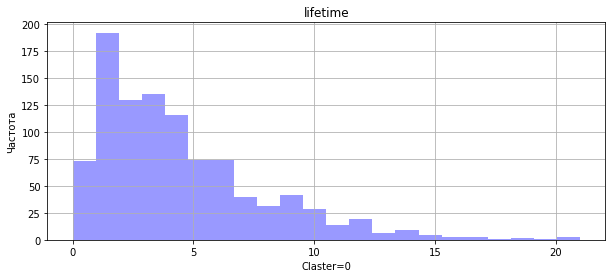

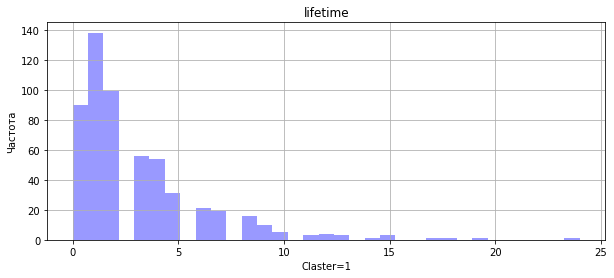

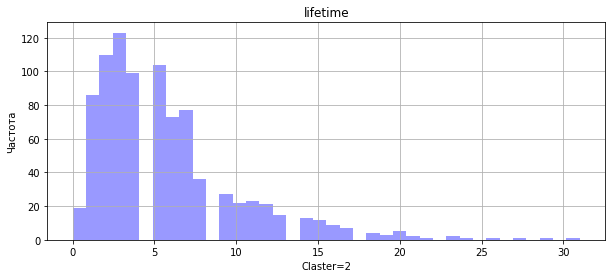

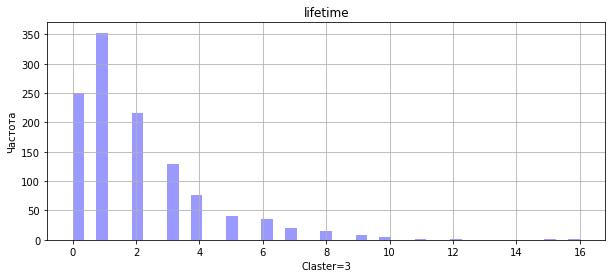

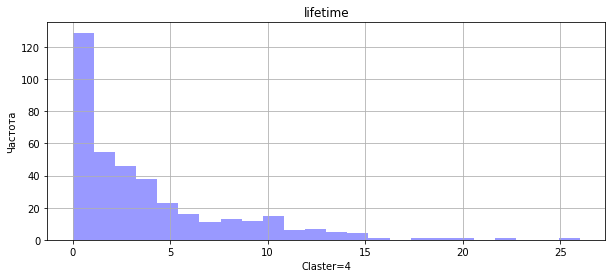

Признак avg_class_frequency_total


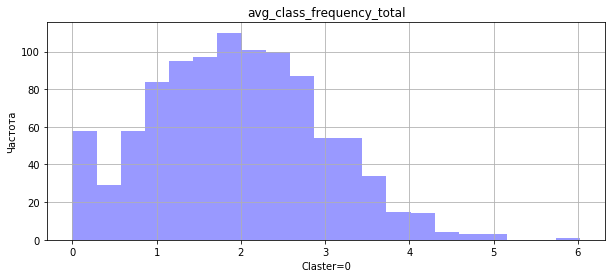

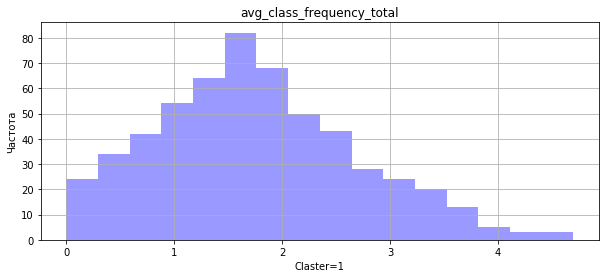

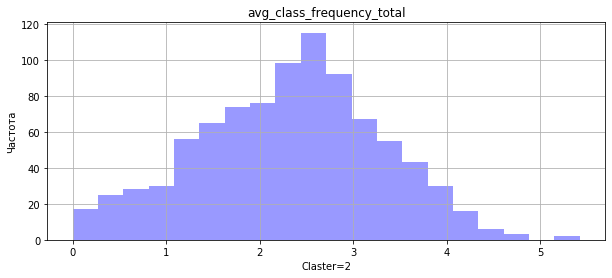

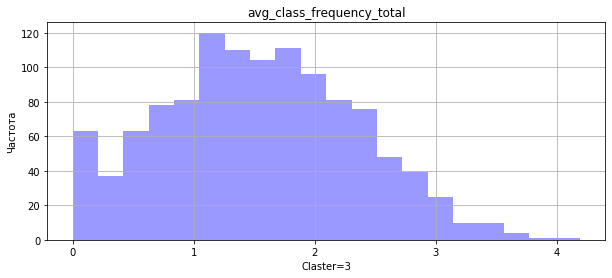

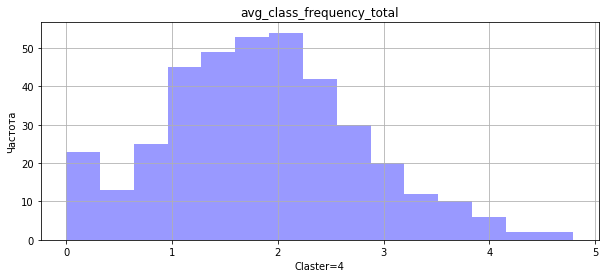

Признак churn


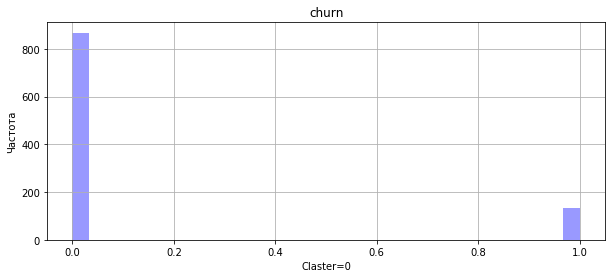

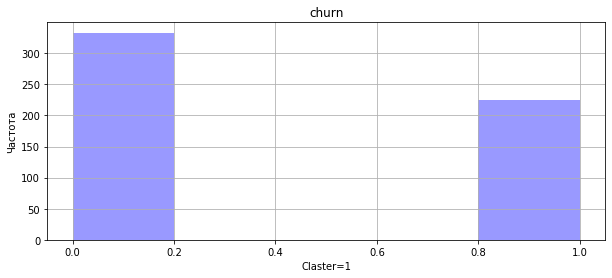

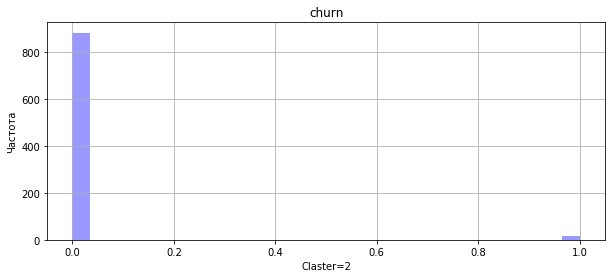

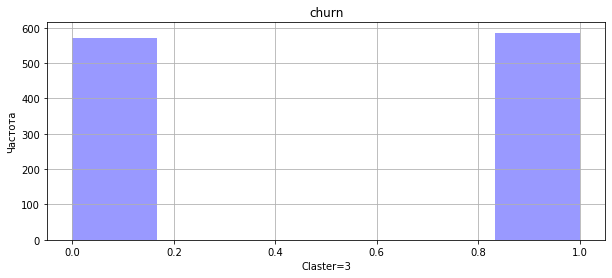

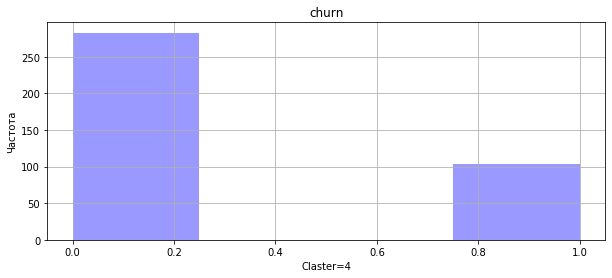

In [45]:
create_claster_hist(gym, columns)

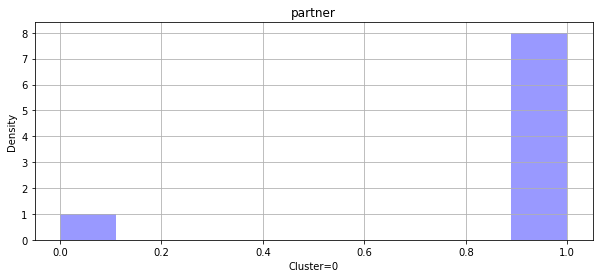

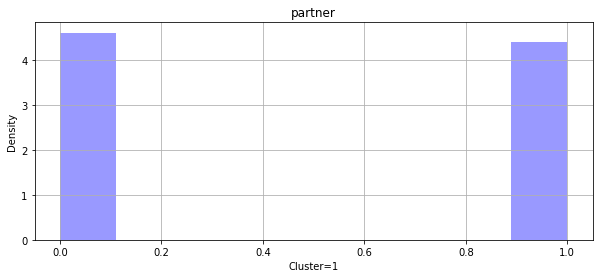

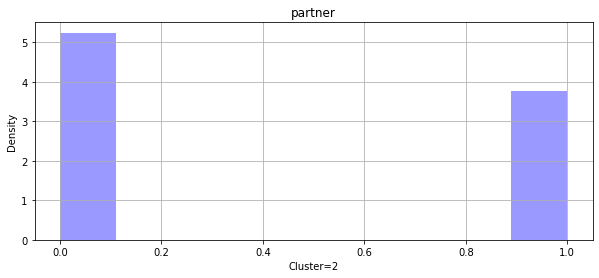

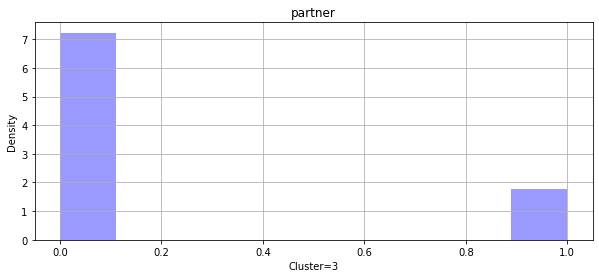

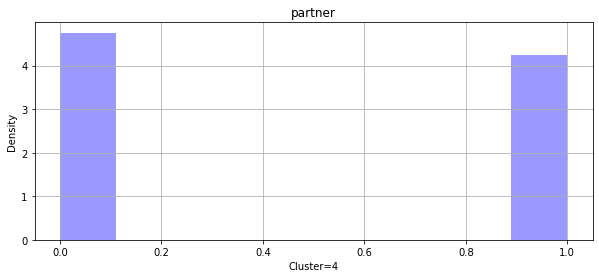

In [49]:
### Код ревьюера
column = 'partner'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

**Признак 'gender' (Пол):**

Распределение по полу во всех кластерах практически равное. В кластере 2 и 4 один пол(1) немного превалирует над вторым (на 50-100 человек).

**Признак 'Near_Location' (проживание или работа в районе, где находится фитнес-центр):**

В кластерах 0, 2, 3, 4 клиенты проживают или работают в районе, где находится фитнес-ценр. Кластер 1 содержит клиентов, которые живут в других районах, то есть, дальше от центра.

**Признак 'Partner' (сотрудник компании-партнёра клуба):**

В кластере 0 большая часть клиентов (80%) - сотрудники компании-партнёра клуба.
В кластерах 1 и 2, 4 почти половина клиентов - это сотрудники компании-партнёра клуба.
В кластере 3 сосредоточились клиенты, в большинстве своём не являющиеся сотрудниками партнеров клуба (таких ~ 70%).

**Признак 'Promo_friends' (факт первоначальной записи в рамках акции «приведи друга»):**

В кластерах 1, 2 и 3 содержится информация о клиентах, которые в большинстве своем пришли в клуб не по акции.
В кластере 0 находятся клиенты, пришедшие по акции  «приведи друга».

**Признак 'Phone' (наличие контактного телефона):**

Во всех кластерах, кроме 4, у клиентов есть оставленный номер телефона.

**Признак 'Group_visits' (факт посещения групповых занятий):**

Половина клиентов из кластеров 0, 2 посешала групповые занятия, а вторая половина - не посешала.
Большинство клиентов из кластера 1, 3, 4 не ходили на групповые занятия.

**Признак 'Age' (возраст):**

Во всех кластерах возраст распределен равномеро и находится в районе 28-30 лет.

**Признак 'Avg_additional_charges_total' (суммарная выручка от других услуг фитнес-центра):**

Чуть больше трат замечено в кластерах 0 и 2 (среднее в районе 152-171 у.е.), меньше всего трат в кластере 3 (среднее - 124 у.е.).

**Признак 'Month_to_end_contract' (срок до окончания текущего действующего абонемента)**

Меньше всего времении до окончания контракта осталось у клиентов из кластера 3(около 2 месяцев), больше всего времени есть у калстеров 0 и 2 (около 6 месяцев).

**Признак 'Lifetime' (время с момента первого обращения в фитнес-центр):**

Среднее время с момента первого обращения в фитнес-центр у кластеров 0 и 2 составляет 4-6 месяцев, у клиентов из кластера 3 это значение меньше - около 2 месяцев.

**Признак 'Avg_class_frequency_total' (средняя частота посещений в неделю за все время с начала действия абонемента)**

Самая высокая средняя частота посещений в неделю у кластера 2 (2 раза внеделю), самая низкая - у кластера 3.

**Признак 'Churn' (факт оттока в текущем месяце):**

В 0 и 2 кластерах собраны клиенты с меньшим оттоком, в 1 и 3 кластерах средний отток больше (~ 40-50%).

### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [43]:
#посчитаем долю оттока
churn_share = gym.groupby('cluster_km')['churn'].agg('sum') / gym.groupby('cluster_km')['churn'].size()
display(churn_share)

cluster_km
0    0.132867
1    0.402154
2    0.016704
3    0.506045
4    0.266839
Name: churn, dtype: float64

Кластеры 1 и 3 склонны к оттоку (40 - 50% клентов ушло), кластеры 0 и 2 более надёжны (ушло только 1 - 13% клиентов).

## Шаг 5. Выводы и базовые рекомендации по работе с клиентами

В проекте был проведен анализ данных о клиентах сети фитнес-центров «Культурист-датасаентист».

Сформированы типичные портреты клиентов: 

**1 группа** - Клиенты с малым оттоком (13%), живут или работают около клуба, большинство пришло от компании-партнера, пришли по рекомендации друзей и акции "Приведи друга" (то есть, возможно, кто-то занимается коллективно, а вместе, как правило, веселее), с умеренной частотностью посещают групповые занятия (50%), довольно прилично в среднем тратят на дополнительные услуги (152 у.е.), довольно долго являются членами клуба (4 месяца). которые живут близко к клубу, пришли не по акции друзей, со средней активностью посещают групповые занятия, а до прекращения контракта у них осталось ~ 6 месяцев. Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю.

**2 группа** - Клиенты с довольно большим оттоком (40%), живут не в том районе, где находится клуб (то есть, им требуется время на дорогу), пришли сами, не по акции "Приведи друга", и почти не ходят на групповые занятия, в клубе состоят в среднем 3 месяца. 

**3 группа** - Клиенты с большим оттоком (50%), большинство клиентов пришло само по себе, не по акции "Приведи друга", мало посещают групповые занятия (23%), немного тратят на доп. услуги в клубе (~124 у.е.), у них скоро закончится контракт (осталось 2 месяца), при этом они сами недавно начали заниматься в клубе (около 2 месяцев). 


Проанализированы основные признаки, наиболее сильно влияющие на отток.
Это признак 'Near_Location' (проживание или работа в районе, где находится фитнес-центр), признак 'Promo_friends' (факт первоначальной записи в рамках акции «приведи друга»), признак 'Group_visits' (факт посещения групповых занятий) и признак 'Lifetime' (время с момента первого обращения в фитнес-центр). 

**Выводы на основании этих признаков:**

1. Если клиент стал реже ходить на групповые тренировки, то есть большой шанс на отток клиента. 
2. Если клиент живет далеко, и ему требуется время на дорогу, то вероятность оттока выше, на удержание таких клиентов следует направить больше усилий.
3. Если клиент пришел сам по себе, не по акции "Приведи друга", то есть шанс, что он уйдет. Таких клиентов следует заинтересовать групповыми занятиями, так как коллективный спорт и новые знакомства стимулируют клиентов чаще и дольше ходить в фитнес-клубы, так как происходит завязывание и укрепление новых социальных связей.
4. Те, кто в клуб пришел недавно, могут остаться незаинтересованными и в скором времени покинуть клуб, поэтому на "свежих" клиентов нужно направить больше усилий по удержанию, так как атмосфера клуба, обстановка и персонал для них новы, нужно в первое время окружить их бОльшим вниманием и заботой, чтобы клиент почувствовал себя комфортно и привык к новому месту.

**Примеры реализации принципов взаимодействия с клиентами и их удержания в виде маркетинговых действий:**

1. Взаимодействие в соцсетях: активное ведение страниц клуба в соцсетях и продвижение. Создать атмосферу, чтобы клиенты ощущали чувство принадлежности к сообществу клуба. 
2. Улучшение и поддержание интерьера клуба и работоспособности тренажеров, чтобы клиентам было так же комфортно заниматься в нем, как раньше.
3. Проведение коллективных активностей в клубе (бесплатные тренировки по субботам, различные мероприятия после занятий или по вечерам; организация специальных фитнес-мероприятий).
4. Индивидуальный подход к клиентам (заинтересованность их успехами, предложение советов и помощи, чтобы их поддержать). Так клиенты будут знать, что они нам небезразличны.
